In [4]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

In [5]:
# covid Data API import
url = "https://api.apify.com/v2/key-value-stores/vpfkeiYLXPIDIea2T/records/LATEST?disableRedirect=true"


In [6]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "README": "https://apify.com/puorc/mexico-covid19?utm_source=app",
    "State": {
        "Aguascalientes": {
            "deceased": 676,
            "infected": 7753
        },
        "Baja California": {
            "deceased": 3680,
            "infected": 22137
        },
        "Baja California Sur": {
            "deceased": 537,
            "infected": 10925
        },
        "Campeche": {
            "deceased": 840,
            "infected": 6235
        },
        "Chiapas": {
            "deceased": 1323,
            "infected": 8079
        },
        "Chihuahua": {
            "deceased": 1483,
            "infected": 12753
        },
        "Ciudad de Mexico": {
            "deceased": 10730,
            "infected": 138329
        },
        "Coahuila": {
            "deceased": 1996,
            "infected": 28317
        },
        "Colima": {
            "deceased": 579,
            "infected": 5671
        },
        "Durango": {
            "deceased": 689,
 

In [7]:
Covid_data_dic = response['State']
Covid_data_dic

{'Ciudad de Mexico': {'infected': 138329, 'deceased': 10730},
 'Baja California Sur': {'infected': 10925, 'deceased': 537},
 'Tabasco': {'infected': 32868, 'deceased': 2893},
 'Sonora': {'infected': 35177, 'deceased': 2971},
 'Coahuila': {'infected': 28317, 'deceased': 1996},
 'Yucatan': {'infected': 19426, 'deceased': 1635},
 'San Luis Potosi': {'infected': 24279, 'deceased': 1782},
 'Tamaulipas': {'infected': 30066, 'deceased': 2381},
 'Nuevo Leon': {'infected': 43667, 'deceased': 3306},
 'Quintana Roo': {'infected': 12590, 'deceased': 1743},
 'Colima': {'infected': 5671, 'deceased': 579},
 'Guanajuato': {'infected': 43054, 'deceased': 3099},
 'Sinaloa': {'infected': 19791, 'deceased': 3366},
 'Campeche': {'infected': 6235, 'deceased': 840},
 'Baja California': {'infected': 22137, 'deceased': 3680},
 'Tlaxcala': {'infected': 7820, 'deceased': 1133},
 'Guerrero': {'infected': 20295, 'deceased': 2057},
 'Aguascalientes': {'infected': 7753, 'deceased': 676},
 'Durango': {'infected': 984

In [8]:
states = ['Aguascalientes'	,
 'Baja California'	,
 'Baja California Sur'	,
 'Campeche'	,
 'Chiapas'	,
 'Chihuahua'	,
 'Ciudad de Mexico'	,
 'Coahuila'	,
 'Colima'	,
 'Durango'	,
 'Estado de Mexico'	,
 'Guanajuato'	,
 'Guerrero'	,
 'Hidalgo'	,
 'Jalisco'	,
 'Michoacan'	,
 'Morelos'	,
 'Nayarit'	,
 'Nuevo Leon'	,
 'Oaxaca'	,
 'Puebla'	,
 'Queretaro'	,
 'Quintana Roo'	,
 'San Luis Potosi'	,
 'Sinaloa'	,
 'Sonora'	,
 'Tabasco'	,
 'Tamaulipas'	,
 'Tlaxcala'	,
 'Veracruz'	,
 'Yucatan'	,
 'Zacatecas'	]


In [9]:
infected = []

In [10]:
for x in states:
    infected.append(Covid_data_dic[x]['infected'])

In [11]:
infected

[7753,
 22137,
 10925,
 6235,
 8079,
 12753,
 138329,
 28317,
 5671,
 9844,
 88619,
 43054,
 20295,
 13844,
 29252,
 21927,
 6283,
 6247,
 43667,
 18694,
 32922,
 10086,
 12590,
 24279,
 19791,
 35177,
 32868,
 30066,
 7820,
 34679,
 19426,
 8122]

In [12]:
data = {"State": states,"Covid Cases":infected}


covid_df = pd.DataFrame(data,columns=['State',  'Covid Cases'])
covid_df.head()

,State,Covid Cases
0,Aguascalientes,7753
1,Baja California,22137
2,Baja California Sur,10925
3,Campeche,6235
4,Chiapas,8079


In [13]:
print(f"COVID19 infected data has been updated succesfully")

COVID19 infected data has been updated succesfully


In [18]:
file1 = "clean_data/poblacion.csv"
file2 = "clean_data/tourist.csv"
file3 = "clean_data/crimenes.csv"

In [19]:
poblacion_df = pd.read_csv(file1)
tourist_df = pd.read_csv(file2)
crimes_df = pd.read_csv(file3)

In [20]:
poblacion_df.head()

,State,Total
0,Aguascalientes,1425607
1,Baja California,3769020
2,Baja California Sur,798447
3,Campeche,928363
4,Coahuila,3146771


In [21]:
tourist_df.head()

,State,Number of Tourists
0,Aguascalientes,"856,960"
1,Baja California,"3,958,843"
2,Baja California Sur,"3,445,908"
3,Campeche,"1,578,131.00"
4,Chiapas,"4,376,440.00"


In [22]:
crimes_df.head()

,State,Crimes
0,Aguascalientes,13252
1,Baja California,38801
2,Baja California Sur,7356
3,Campeche,827
4,Coahuila de Zaragoza,19368


In [23]:
covid_df.head()

,State,Covid Cases
0,Aguascalientes,7753
1,Baja California,22137
2,Baja California Sur,10925
3,Campeche,6235
4,Chiapas,8079


In [24]:
merge_df = pd.merge(covid_df, poblacion_df, on="State")

In [25]:
merge_df.head()

,State,Covid Cases,Total
0,Aguascalientes,7753,1425607
1,Baja California,22137,3769020
2,Baja California Sur,10925,798447
3,Campeche,6235,928363
4,Chiapas,8079,5543828


In [26]:
final_df = pd.merge(merge_df, tourist_df, on="State")
final_df.head()

,State,Covid Cases,Total,Number of Tourists
0,Aguascalientes,7753,1425607,"856,960"
1,Baja California,22137,3769020,"3,958,843"
2,Baja California Sur,10925,798447,"3,445,908"
3,Campeche,6235,928363,"1,578,131.00"
4,Chiapas,8079,5543828,"4,376,440.00"


In [27]:
final_final_df = pd.merge(final_df, crimes_df, on="State")
final_final_df.head()

,State,Covid Cases,Total,Number of Tourists,Crimes
0,Aguascalientes,7753,1425607,"856,960",13252
1,Baja California,22137,3769020,"3,958,843",38801
2,Baja California Sur,10925,798447,"3,445,908",7356
3,Campeche,6235,928363,"1,578,131.00",827
4,Chiapas,8079,5543828,"4,376,440.00",6482


In [55]:
renamed_df = final_final_df.rename(columns={"Covid Cases": "Covid Cases",
                                                "Total": "Population",
                                                "Number of Tourists": "Tourists",
                                                "Crimes": "Crimes"
                                                })
renamed_df.head()

,State,Covid Cases,Population,Tourists,Crimes
0,Aguascalientes,7753,1425607,"856,960",13252
1,Baja California,22137,3769020,"3,958,843",38801
2,Baja California Sur,10925,798447,"3,445,908",7356
3,Campeche,6235,928363,"1,578,131.00",827
4,Chiapas,8079,5543828,"4,376,440.00",6482


In [64]:
#Removing commas from our Tourists column so all column formats match
renamed_df.Tourists = renamed_df.Tourists.apply(lambda x : x.replace(',',''))
renamed_df.Tourists = renamed_df.Tourists.apply(lambda x : x.replace('.00',''))
renamed_df

,State,Covid Cases,Population,Tourists,Crimes
0,Aguascalientes,7753,1425607,856960,13252
1,Baja California,22137,3769020,3958843,38801
2,Baja California Sur,10925,798447,3445908,7356
3,Campeche,6235,928363,1578131,827
4,Chiapas,8079,5543828,4376440,6482
5,Chihuahua,12753,3741869,5228183,25089
6,Colima,5671,731391,1450627,7881
7,Durango,9844,1832650,829529,9696
8,Guanajuato,43054,6166934,5026515,54610
9,Guerrero,20295,3540685,9065181,9692


In [110]:
renamed_df["Tourists"]= renamed_df["Tourists"].astype(int)
renamed_df.dtypes

State          object
Covid Cases     int64
Population      int64
Tourists        int32
Crimes          int64
dtype: object

**Summary statistics**

In [73]:
#We calculated the mean,median,variance, standard_dv and sem for each Covid Case in the Mexico. 
#We then created a dataframe with all the information.

mean = renamed_df['Covid Cases'].mean()
median = renamed_df['Covid Cases'].median()
variance = renamed_df['Covid Cases'].var()
standard_dv = renamed_df['Covid Cases'].std()
sem = renamed_df['Covid Cases'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,17409.652174,12753.0,1.280841e+08,11317.423183,2359.845864


In [74]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Covid Cases"]
summary_stats2

mean      1.740965e+04
median    1.275300e+04
var       1.280841e+08
std       1.131742e+04
sem       2.359846e+03
Name: Covid Cases, dtype: float64

In [75]:
#We calculated the mean,median,variance, standard_dv and sem for Population in the Mexico. 
#We then created a dataframe with all the information.

mean = renamed_df['Population'].mean()
median = renamed_df['Population'].median()
variance = renamed_df['Population'].var()
standard_dv = renamed_df['Population'].std()
sem = renamed_df['Population'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,3.067713e+06,2944840.0,4.065723e+12,2.016364e+06,420440.894317


In [76]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Population"]
summary_stats2

mean      3.067713e+06
median    2.944840e+06
var       4.065723e+12
std       2.016364e+06
sem       4.204409e+05
Name: Population, dtype: float64

In [111]:
#We calculated the mean,median,variance, standard_dv and sem for Tourists in the Mexico. 
#We then created a dataframe with all the information.
mean = renamed_df['Tourists'].mean()
median = renamed_df['Tourists'].median()
variance = renamed_df['Tourists'].var()
standard_dv = renamed_df['Tourists'].std()
sem = renamed_df['Tourists'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,4.121846e+06,3445908.0,1.344521e+13,3.666770e+06,764574.489021


In [112]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Tourists"]
summary_stats2

mean      4.121846e+06
median    3.445908e+06
var       1.344521e+13
std       3.666770e+06
sem       7.645745e+05
Name: Tourists, dtype: float64

In [48]:
#We calculated the mean,median,variance, standard_dv and sem for Crimes in the Mexico. 
#We then created a dataframe with all the information.
mean = renamed_df['Crimes'].mean()
median = renamed_df['Crimes'].median()
variance = renamed_df['Crimes'].var()
standard_dv = renamed_df['Crimes'].std()
sem = renamed_df['Crimes'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,15657.217391,12693.0,1.842994e+08,13575.691039,2830.727262


In [49]:
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Crimes"]
summary_stats2

mean      1.565722e+04
median    1.269300e+04
var       1.842994e+08
std       1.357569e+04
sem       2.830727e+03
Name: Crimes, dtype: float64

In [85]:
#Error en merge
unique_items=len(renamed_df["Tourists"].unique())
unique_items

23

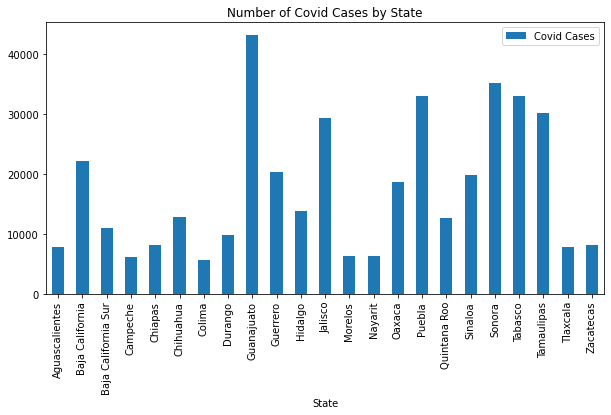

<Figure size 432x288 with 0 Axes>

In [105]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_data = pd.DataFrame(renamed_df.groupby(["State"]).sum()).reset_index()
bar_data
# #Barframe into two columns
bar_data = bar_data [["State", "Covid Cases"]]
bar_data = bar_data .set_index("State")

#Creating the bar chart
bar_data.plot(kind="bar", figsize=(10,5))

plt.title("Number of Covid Cases by State")
plt.show()
plt.tight_layout()

Text(0, 0.5, '')

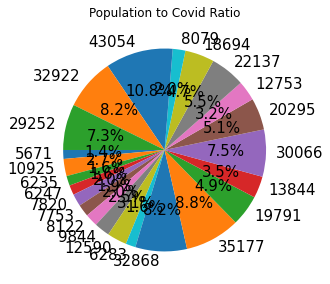

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
covid_df = pd.DataFrame(renamed_df.groupby(["Population"]).sum()).reset_index()
covid_df
# #Dataframe to two columns
covid_df = covid_df[["Population","Covid Cases"]]
#Plot pie chart with pandas
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
covid_df.plot(kind='pie', y ="Covid Cases", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=covid_df['Covid Cases'], legend = False, fontsize=15)

plt.title("Population to Covid Ratio")
plt.xlabel("")
plt.ylabel("")